In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import xgboost as xgb 

In [3]:
#reading the data using pandas from google drive
data = pd.read_csv("C:\\Users\\mesho\\OneDrive\\Desktop\\ML Assignment\\case_time_series.csv")
df = pd.DataFrame(data, columns= ['Daily Confirmed'])
df

,Daily Confirmed
0,1
1,0
2,0
3,1
4,1
...,...
490,132424
491,120454
492,114488
493,101209


In [4]:
#approx population of India
total_population = 1366400000
#infection spread
infection_spread = df.values / total_population

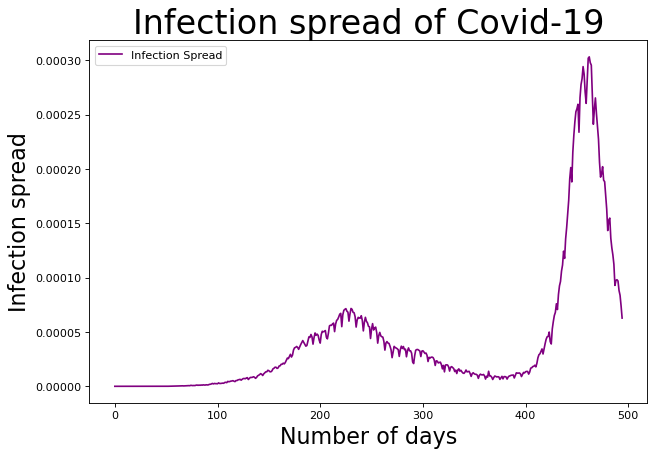

In [5]:
#plotting infection spread
plt.figure(figsize=(9, 6), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(infection_spread[:, 0], color = 'purple', label = 'Infection Spread')
plt.title('Infection spread of Covid-19', fontsize = 30)
plt.xlabel('Number of days', fontsize=20)
plt.ylabel('Infection spread', fontsize = 20)
plt.legend(loc = 'best')
plt.show()

In [6]:
#calculating the peak value
peak_value = max(infection_spread)
peak_value = peak_value[0]
to_predict_value = peak_value * 0.1
to_predict_value

3.0319086651053864e-05

In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
#prediction day since july 31st is 56 days away from june 5
prediction_days = 56
#getting the values and scaling them
training_set = df.values
training_set = min_max_scaler.fit_transform(training_set)

In [8]:
#making a training set
x_train = []
y_train = []
for i in range(50, len(training_set)):
  x_train.append(training_set[i-50:i, 0]) 
  y_train.append(training_set[i, 0]) 

In [9]:
#Converting to numpy array and changing dimension
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# Model Parameters
num_units = 50
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
# Model
# Initialize the RNN
regressor = Sequential()

In [16]:
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

In [17]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Training the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/100
89/89 [==============================] - 2s 8ms/step - loss: 0.0282
Epoch 2/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0062
Epoch 3/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 4/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 5/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 6/100
89/89 [==============================] - 1s 8ms/step - loss: 9.3778e-04
Epoch 7/100
89/89 [==============================] - 1s 8ms/step - loss: 8.2329e-04
Epoch 8/100
89/89 [==============================] - 1s 8ms/step - loss: 4.9150e-04
Epoch 9/100
89/89 [==============================] - 1s 8ms/step - loss: 6.1460e-04
Epoch 10/100
89/89 [==============================] - 1s 8ms/step - loss: 5.2532e-04
Epoch 11/100
89/89 [==============================] - 1s 8ms/step - loss: 5.4307e-04
Epoch 12/100
89/89 [==============================] - 1s 8ms/step - loss: 5.6788e-04
Epoch 13/

89/89 [==============================] - 1s 9ms/step - loss: 4.2328e-04
Epoch 98/100
89/89 [==============================] - 1s 9ms/step - loss: 5.3264e-04
Epoch 99/100
89/89 [==============================] - 1s 9ms/step - loss: 4.0974e-04
Epoch 100/100
89/89 [==============================] - 1s 9ms/step - loss: 2.5518e-04


In [19]:
# FIRST 50 day input var
input = df[len(df) - 50:].values
#making it 2D to scale
input = input.reshape(-1,1)
input = min_max_scaler.transform(input)

In [20]:
#initalising the variable that will be passed to model
X_test = []
X_test.append(input)
X_test = np.array(X_test)
#predicting values
predicted_case = regressor.predict(X_test)
predictions = []
for i in range(0, prediction_days):
  predictions.append(predicted_case)
  X_test = np.insert(X_test, 49, predicted_case, axis = 1)
  X_test = np.delete(X_test, 0, axis = 1)
  predicted_case = regressor.predict(X_test)

In [21]:
#squeezing to 2d so we can unscale
predictions = np.squeeze(predictions, axis = 2)
#unscaling
predictions = min_max_scaler.inverse_transform(predictions)

In [22]:
#calculating the infection spread prediction
infection_spread_predictions = predictions/total_population

In [23]:
#checking to see if at any point we crossed the value we want to predict
alpha = min(infection_spread_predictions)
alpha[0]

3.9198160997877634e-05

In [24]:
#since we know it crossed finding the closest element to it in our prediction
absolute_val_array = np.abs(infection_spread_predictions - to_predict_value)
smallest_difference_index = absolute_val_array.argmin()
closest_element = infection_spread_predictions[smallest_difference_index]
closest_element

array([3.9198161e-05])

In [25]:
#index of the this value
result = np.where(infection_spread_predictions == closest_element)
result[0][0]

10